In [28]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [30]:
from sklearn.datasets import load_boston

In [31]:
boston = load_boston()



In [32]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Text(0, 0.5, 'Number of Houses')

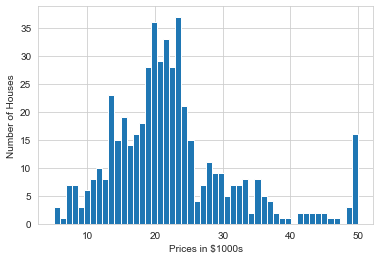

In [33]:
# quick visualization of the data 
plt.hist(boston.target, bins=50)

plt.xlabel('Prices in $1000s')
plt.ylabel('Number of Houses')

Text(0, 0.5, 'price in 1000s')

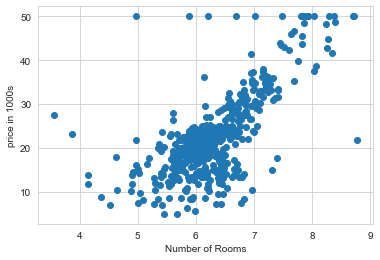

In [34]:
# to plot the number of rooms versus the housing price
plt.scatter(boston.data[:,5],boston.target)
plt.xlabel('Number of Rooms')
plt.ylabel('price in 1000s')

We can make out a slight trend to show that price increases along with the number of rooms in the house

In [35]:
# using pandas to transform the data set into a dataframe
boston_df = DataFrame(boston.data)

boston_df.columns =boston.feature_names

boston_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [36]:
# to add a new column for the target of the boston data set, the price.
boston_df['Price'] = boston.target


boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [52]:
# to calculate the statistics
# Minimum price of the data
minimum_price = np.amin(boston_df['Price'])

# Maximum price of the data
maximum_price = np.amax(boston_df['Price'])

# Mean price of the data
mean_price = np.mean(boston_df['Price'])

# Median price of the data
median_price = np.median(boston_df['Price'])

# Standard deviation of prices of the data
std_price = np.std(boston_df['Price'])

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))


Statistics for Boston housing dataset:

Minimum price: $5.0
Maximum price: $50.0
Mean price: $22.532806324110698
Median price $21.2
Standard deviation of prices: $9.188011545278206


In [37]:
# using scikit learn to implement the multivariate regreesion
import sklearn
from sklearn.linear_model import LinearRegression
lreg= LinearRegression()

In [38]:
# to create a Data Columns
X_multi = boston_df.drop('Price',1)

# Targets
Y_target = boston_df.Price

In [39]:
# Implement Linear Regression to pass x and y
lreg.fit(X_multi,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
print(' The estimated intercept coefficient is %.2f ' %lreg.intercept_)
print(' The number of coefficients used was %d ' % len(lreg.coef_))

 The estimated intercept coefficient is 36.46 
 The number of coefficients used was 13 


In [41]:
# Set a DataFrame from the Features
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

# Set a new column lining up the coefficients from the linear regression
coeff_df["Coefficient Estimate"] = pd.Series(lreg.coef_)

coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


 this shows that the highest correlation between a feature and a house price is the number of rooms.

In [42]:
# Set up X as median room values
X = boston_df.RM

# Use v to make X two-dimensional
X=np.vstack([boston_df.RM,np.ones(len(boston_df.RM))]).T

# Set up Y as the target price of the houses.
Y = boston_df.Price
 

In [43]:
# Grab the output and set as X and Y test and train data sets!
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,boston_df.Price)

In [44]:
# Print shapes of the training and testing data sets
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(379, 2) (127, 2) (379,) (127,)


In [46]:
# to predict house prices based on the multiple variables 
# Create our regression object
lreg = LinearRegression()

# create another  linear regression for the training test only.
lreg.fit(X_train,Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
# Predictions on training and testing sets
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [48]:
print("Fit a model X_train, and calculate MSE with Y_train: %.2f"  % np.mean((Y_train - pred_train) ** 2))
    
print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((Y_test - pred_test) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 45.39
Fit a model X_train, and calculate MSE with X_test and Y_test: 38.78


this shows that our training set and testing set are pretty close 

Text(0.5, 1.0, 'Residual Plots')

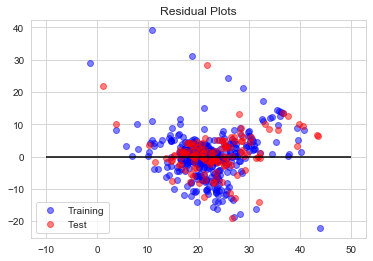

In [49]:
# to create a residual plot to show the correlation between the training and the testing data set  
#Scatter plot the training data
train = plt.scatter(pred_train,(Y_train-pred_train),c='b',alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(pred_test,(Y_test-pred_test),c='r',alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-10,xmax=50)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

this shows that majority of the residuals are randomly allocated above and below the horizontal line which indicates that the model is good at making the prediction.